In [1]:
import pandas as pd
import numpy as np

In [2]:
# cpi:inflation,  mortgage rate, rental vacancy
federal_fiels = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv","CPIAUCSL.csv"]

In [3]:
# parse any dates into pandas datetime format and use first column for the row indices
dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in federal_fiels]

In [4]:
dfs

[            MORTGAGE30US
 DATE                    
 1971-04-02          7.33
 1971-04-09          7.31
 1971-04-16          7.31
 1971-04-23          7.31
 1971-04-30          7.29
 ...                  ...
 2024-02-08          6.64
 2024-02-15          6.77
 2024-02-22          6.90
 2024-02-29          6.94
 2024-03-07          6.88
 
 [2763 rows x 1 columns],
             RRVRUSQ156N
 DATE                   
 1956-01-01          6.2
 1956-04-01          5.9
 1956-07-01          6.3
 1956-10-01          5.8
 1957-01-01          5.3
 ...                 ...
 2022-10-01          5.8
 2023-01-01          6.4
 2023-04-01          6.3
 2023-07-01          6.6
 2023-10-01          6.6
 
 [272 rows x 1 columns],
             CPIAUCSL
 DATE                
 1947-01-01    21.480
 1947-02-01    21.620
 1947-03-01    22.000
 1947-04-01    22.000
 1947-05-01    21.950
 ...              ...
 2023-10-01   307.531
 2023-11-01   308.024
 2023-12-01   308.742
 2024-01-01   309.685
 2024-02-01   311.

In [5]:
# merge different timelines: cpi is monthly, mortgate rate is weekly, and rental vacancy is quartly
fed_data = pd.concat(dfs, axis=1)
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2024-02-08,6.64,NaN,NaN
2024-02-15,6.77,NaN,NaN
2024-02-22,6.90,NaN,NaN


In [6]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-05-18,6.39,NaN,NaN
2023-05-25,6.57,NaN,NaN
2023-06-01,6.79,NaN,304.003
2023-06-08,6.71,NaN,NaN
2023-06-15,6.69,NaN,NaN
2023-06-22,6.67,NaN,NaN
2023-06-29,6.71,NaN,NaN
2023-07-01,NaN,6.6,304.628
2023-07-06,6.81,NaN,NaN


In [7]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-05-18,6.39,NaN,NaN
2023-05-25,6.57,NaN,NaN
2023-06-01,6.79,NaN,304.003
2023-06-08,6.71,NaN,NaN
2023-06-15,6.69,NaN,NaN
2023-06-22,6.67,NaN,NaN
2023-06-29,6.71,NaN,NaN
2023-07-01,NaN,6.6,304.628
2023-07-06,6.81,NaN,NaN


In [8]:
# solution for different timelines: forward fill to distribute quarterly/monthly data across weeks
fed_data = fed_data.ffill()

In [9]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-05-18,6.39,6.3,303.365
2023-05-25,6.57,6.3,303.365
2023-06-01,6.79,6.3,304.003
2023-06-08,6.71,6.3,304.003
2023-06-15,6.69,6.3,304.003
2023-06-22,6.67,6.3,304.003
2023-06-29,6.71,6.3,304.003
2023-07-01,6.71,6.6,304.628
2023-07-06,6.81,6.6,304.628


In [10]:
# weekly
df1 = pd.read_csv("Metro_median_sale_price_uc_sfrcondo_week.csv")
df1

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-12-02,2023-12-09,2023-12-16,2023-12-23,2023-12-30,2024-01-06,2024-01-13,2024-01-20,2024-01-27,2024-02-03
0,102001,0,United States,country,NaN,176900.0,171810.0,173000.0,169000.0,177500.0,...,330000.0,325000.0,325000.0,317851.0,321000.0,325000.0,325000.0,325000.0,320000.0,330000.0
1,394913,1,"New York, NY",msa,NY,395000.0,405917.0,410250.0,410000.0,387000.0,...,570000.0,560000.0,574900.0,575000.0,570000.0,580500.0,565000.0,575000.0,575000.0,560000.0
2,753899,2,"Los Angeles, CA",msa,CA,450000.0,460000.0,474000.0,482000.0,460000.0,...,893500.0,885000.0,890000.0,861500.0,860000.0,869000.0,908500.0,830000.0,850000.0,870500.0
3,394463,3,"Chicago, IL",msa,IL,226500.0,220000.0,225000.0,214500.0,228000.0,...,305000.0,280000.0,290000.0,280000.0,270000.0,280000.0,290000.0,290000.0,282000.0,284000.0
4,394514,4,"Dallas, TX",msa,TX,136887.0,129000.0,140080.0,137000.0,139350.0,...,373000.0,365000.0,367863.0,361100.0,377000.0,370000.0,376950.0,364000.0,360000.0,367159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,394905,341,"New Bern, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,275000.0,250000.0,305000.0,220000.0
208,395080,390,"Sebring, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,220000.0,220000.0,216000.0,220000.0
209,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,790000.0,685000.0,699900.0,557500.0,505000.0,620000.0,702500.0,772500.0,700000.0,675000.0
210,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,637000.0,1062500.0,970000.0,956701.0,1270000.0,790000.0,870000.0,1300000.0,1000000.0,1145000.0


In [11]:
# whereas monthly
df2 = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv")
df2

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,102066.723398,102325.134506,102872.937891,103617.903465,104422.257114,...,346710.707994,351153.293294,353756.573851,354574.297056,354239.377178,353111.937686,351743.969214,349605.496089,348170.585487,349216.498733
1,394913,1,"New York, NY",msa,NY,178474.779852,177739.600114,177569.023789,177793.340930,178655.172637,...,616747.953610,624249.681969,630343.935406,633059.762141,634249.174105,635279.563986,635249.069156,636362.694490,636941.660210,640485.741417
2,753899,2,"Los Angeles, CA",msa,CA,185452.585240,186598.596892,187465.936966,187833.585659,188476.217739,...,890843.897055,905865.934251,916220.985393,921093.993895,924255.575549,925119.006526,924416.648435,920688.085078,920053.242890,926860.977848
3,394463,3,"Chicago, IL",msa,IL,129644.374948,129051.457766,130466.841005,132148.339940,133709.170452,...,300773.928802,306772.937339,310600.614719,312190.965663,312101.019307,311472.294567,309890.391907,307686.288017,306498.670674,307944.440451
4,394514,4,"Dallas, TX",msa,TX,109830.986773,110509.150315,111563.142434,112413.465437,112921.778396,...,377691.664449,381054.092954,382055.571114,381319.289054,379124.636054,376477.006435,374180.841935,371483.875831,370686.446567,372659.910411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,120509.356221,121838.397460,123622.215089,123183.336480,121411.683262,118362.607496,114744.838020,112094.279807,108557.565563,108158.571846
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,392890.341139,396931.169038,399779.993078,397216.545529,391610.923570,384500.395841,382022.055508,375680.523150,375565.190964,376253.540700
892,753874,937,"Craig, CO",msa,CO,67894.066020,68242.018139,69041.063030,69274.690135,70423.044528,...,274040.037932,280951.621538,284257.278307,284922.909621,285802.453839,286169.771906,283737.935881,280162.378615,277255.069632,277298.614079
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,95946.271032,94993.402993,94699.838880,93420.906013,91499.897848,90056.674730,86999.393453,85514.621178,86109.790489,85537.828997


In [12]:
# house median price value, zillow computed house value
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", 
                "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

In [13]:
zillow_dfs = [pd.read_csv(df) for df in zillow_files]

In [14]:
zillow_dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-12-02,2023-12-09,2023-12-16,2023-12-23,2023-12-30,2024-01-06,2024-01-13,2024-01-20,2024-01-27,2024-02-03
0,102001,0,United States,country,NaN,176900.0,171810.0,173000.0,169000.0,177500.0,...,330000.0,325000.0,325000.0,317851.0,321000.0,325000.0,325000.0,325000.0,320000.0,330000.0
1,394913,1,"New York, NY",msa,NY,395000.0,405917.0,410250.0,410000.0,387000.0,...,570000.0,560000.0,574900.0,575000.0,570000.0,580500.0,565000.0,575000.0,575000.0,560000.0
2,753899,2,"Los Angeles, CA",msa,CA,450000.0,460000.0,474000.0,482000.0,460000.0,...,893500.0,885000.0,890000.0,861500.0,860000.0,869000.0,908500.0,830000.0,850000.0,870500.0
3,394463,3,"Chicago, IL",msa,IL,226500.0,220000.0,225000.0,214500.0,228000.0,...,305000.0,280000.0,290000.0,280000.0,270000.0,280000.0,290000.0,290000.0,282000.0,284000.0
4,394514,4,"Dallas, TX",msa,TX,136887.0,129000.0,140080.0,137000.0,139350.0,...,373000.0,365000.0,367863.0,361100.0,377000.0,370000.0,376950.0,364000.0,360000.0,367159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,394905,341,"New Bern, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,275000.0,250000.0,305000.0,220000.0
208,395080,390,"Sebring, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,220000.0,220000.0,216000.0,220000.0
209,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,790000.0,685000.0,699900.0,557500.0,505000.0,620000.0,702500.0,772500.0,700000.0,675000.0
210,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,637000.0,1062500.0,970000.0,956701.0,1270000.0,790000.0,870000.0,1300000.0,1000000.0,1145000.0


In [15]:
zillow_dfs[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,102066.723398,102325.134506,102872.937891,103617.903465,104422.257114,...,346710.707994,351153.293294,353756.573851,354574.297056,354239.377178,353111.937686,351743.969214,349605.496089,348170.585487,349216.498733
1,394913,1,"New York, NY",msa,NY,178474.779852,177739.600114,177569.023789,177793.340930,178655.172637,...,616747.953610,624249.681969,630343.935406,633059.762141,634249.174105,635279.563986,635249.069156,636362.694490,636941.660210,640485.741417
2,753899,2,"Los Angeles, CA",msa,CA,185452.585240,186598.596892,187465.936966,187833.585659,188476.217739,...,890843.897055,905865.934251,916220.985393,921093.993895,924255.575549,925119.006526,924416.648435,920688.085078,920053.242890,926860.977848
3,394463,3,"Chicago, IL",msa,IL,129644.374948,129051.457766,130466.841005,132148.339940,133709.170452,...,300773.928802,306772.937339,310600.614719,312190.965663,312101.019307,311472.294567,309890.391907,307686.288017,306498.670674,307944.440451
4,394514,4,"Dallas, TX",msa,TX,109830.986773,110509.150315,111563.142434,112413.465437,112921.778396,...,377691.664449,381054.092954,382055.571114,381319.289054,379124.636054,376477.006435,374180.841935,371483.875831,370686.446567,372659.910411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,120509.356221,121838.397460,123622.215089,123183.336480,121411.683262,118362.607496,114744.838020,112094.279807,108557.565563,108158.571846
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,392890.341139,396931.169038,399779.993078,397216.545529,391610.923570,384500.395841,382022.055508,375680.523150,375565.190964,376253.540700
892,753874,937,"Craig, CO",msa,CO,67894.066020,68242.018139,69041.063030,69274.690135,70423.044528,...,274040.037932,280951.621538,284257.278307,284922.909621,285802.453839,286169.771906,283737.935881,280162.378615,277255.069632,277298.614079
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,95946.271032,94993.402993,94699.838880,93420.906013,91499.897848,90056.674730,86999.393453,85514.621178,86109.790489,85537.828997


In [16]:
zillow_dfs = [pd.DataFrame(df.iloc[0,5:]) for df in zillow_dfs]

In [17]:
for df in zillow_dfs:
    # parse string to dataframe datetime
    df.index = pd.to_datetime(df.index)
    df['month'] = df.index.to_period("M")

In [18]:
zillow_dfs[1]

,0,month
1996-02-29,102067,1996-02
1996-03-31,102325,1996-03
1996-04-30,102873,1996-04
1996-05-31,103618,1996-05
1996-06-30,104422,1996-06
...,...,...
2023-10-31,353112,2023-10
2023-11-30,351744,2023-11
2023-12-31,349605,2023-12
2024-01-31,348171,2024-01


In [19]:
zillow_dfs[0]

,0,month
2008-02-02,176900,2008-02
2008-02-09,171810,2008-02
2008-02-16,173000,2008-02
2008-02-23,169000,2008-02
2008-03-01,177500,2008-03
...,...,...
2024-01-06,325000,2024-01
2024-01-13,325000,2024-01
2024-01-20,325000,2024-01
2024-01-27,320000,2024-01


In [20]:
price_dfs = pd.merge(zillow_dfs[0], zillow_dfs[1], on="month")
price_dfs.index = zillow_dfs[0].index

In [21]:
price_dfs

,0_x,month,0_y
2008-02-02,176900,2008-02,197587
2008-02-09,171810,2008-02,197587
2008-02-16,173000,2008-02,197587
2008-02-23,169000,2008-02,197587
2008-03-01,177500,2008-03,196277
...,...,...,...
2024-01-06,325000,2024-01,348171
2024-01-13,325000,2024-01,348171
2024-01-20,325000,2024-01,348171
2024-01-27,320000,2024-01,348171


In [22]:
del price_dfs['month']

In [23]:
price_dfs

,0_x,0_y
2008-02-02,176900,197587
2008-02-09,171810,197587
2008-02-16,173000,197587
2008-02-23,169000,197587
2008-03-01,177500,196277
...,...,...
2024-01-06,325000,348171
2024-01-13,325000,348171
2024-01-20,325000,348171
2024-01-27,320000,348171


In [24]:
price_dfs.columns = ["price", "value"]

In [25]:
price_dfs

,price,value
2008-02-02,176900,197587
2008-02-09,171810,197587
2008-02-16,173000,197587
2008-02-23,169000,197587
2008-03-01,177500,196277
...,...,...
2024-01-06,325000,348171
2024-01-13,325000,348171
2024-01-20,325000,348171
2024-01-27,320000,348171


### Merge zillow price data with federal reserve ecnomic data
make sure data consistent

In [26]:
fed_data = fed_data.dropna()

In [27]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-11-09,7.50,6.6,308.024
2023-11-16,7.44,6.6,308.024
2023-11-22,7.29,6.6,308.024
2023-11-30,7.22,6.6,308.024
2023-12-01,7.22,6.6,308.742
2023-12-07,7.03,6.6,308.742
2023-12-14,6.95,6.6,308.742
2023-12-21,6.67,6.6,308.742
2023-12-28,6.61,6.6,308.742


In [28]:
price_dfs.tail(20)

,price,value
2023-09-23,330000,354239
2023-09-30,336000,354239
2023-10-07,330000,353112
2023-10-14,329000,353112
2023-10-21,332000,353112
2023-10-28,330000,353112
2023-11-04,331500,351744
2023-11-11,324000,351744
2023-11-18,330000,351744
2023-11-25,320000,351744


#### Align federal reserve data with zillow data
federal release data on Tuesday, whereas zillow release data on Thursday

In [29]:
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days=2)

In [30]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-11-11,7.50,6.6,308.024
2023-11-18,7.44,6.6,308.024
2023-11-24,7.29,6.6,308.024
2023-12-02,7.22,6.6,308.024
2023-12-03,7.22,6.6,308.742
2023-12-09,7.03,6.6,308.742
2023-12-16,6.95,6.6,308.742
2023-12-23,6.67,6.6,308.742
2023-12-30,6.61,6.6,308.742


In [31]:
# The 
price_dfs = fed_data.merge(price_dfs, left_index=True, right_index=True)

In [32]:
price_dfs

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,176900,197587
2008-02-09,5.67,10.1,212.687,171810,197587
2008-02-16,5.72,10.1,212.687,173000,197587
2008-02-23,6.04,10.1,212.687,169000,197587
2008-03-01,6.24,10.1,212.687,177500,196277
...,...,...,...,...,...
2024-01-06,6.62,6.6,309.685,325000,348171
2024-01-13,6.66,6.6,309.685,325000,348171
2024-01-20,6.60,6.6,309.685,325000,348171
2024-01-27,6.69,6.6,309.685,320000,348171


In [33]:
price_dfs.columns = ["interest", "vacancy", "inflation", "price", "value"]

In [34]:
price_dfs

,interest,vacancy,inflation,price,value
2008-02-02,5.68,10.1,212.174,176900,197587
2008-02-09,5.67,10.1,212.687,171810,197587
2008-02-16,5.72,10.1,212.687,173000,197587
2008-02-23,6.04,10.1,212.687,169000,197587
2008-03-01,6.24,10.1,212.687,177500,196277
...,...,...,...,...,...
2024-01-06,6.62,6.6,309.685,325000,348171
2024-01-13,6.66,6.6,309.685,325000,348171
2024-01-20,6.60,6.6,309.685,325000,348171
2024-01-27,6.69,6.6,309.685,320000,348171


#### Data Exploration
price: the average price house is sold for in that week 
value：zillow computed average value of all houses in the u.s.

<Axes: >

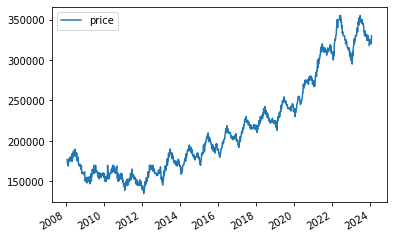

In [35]:
price_dfs.plot.line(y="price", use_index=True)

In [36]:
# take inflation out of price, looking only at the underlying house value change
price_dfs['adj_price'] = price_dfs['price'] / price_dfs['inflation'] * 100

<Axes: >

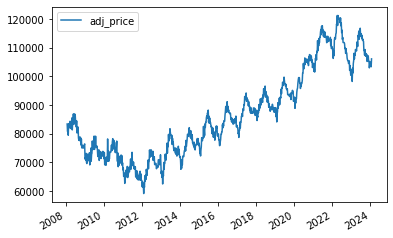

In [37]:
price_dfs.plot.line(y="adj_price", use_index=True)

<Axes: >

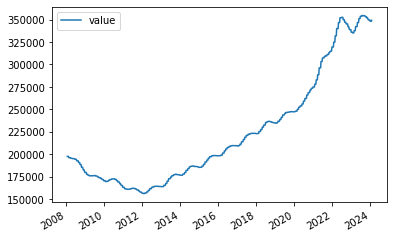

In [38]:
price_dfs.plot.line(y="value", use_index=True)

In [39]:
# also adjust value column
price_dfs["adj_value"] = price_dfs["value"] / price_dfs["inflation"] * 100

<Axes: >

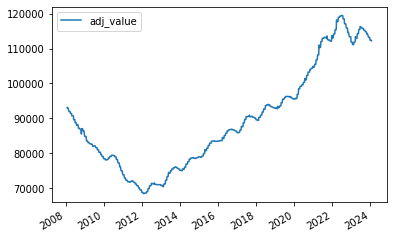

In [40]:
price_dfs.plot.line(y="adj_value", use_index=True)

In [41]:
price_dfs["next_quarter"] = price_dfs["adj_price"].shift(-13)

In [42]:
price_dfs

,interest,vacancy,inflation,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,176900,197587,83375,93124.8,85498.7
2008-02-09,5.67,10.1,212.687,171810,197587,80780.7,92900.2,81316.7
2008-02-16,5.72,10.1,212.687,173000,197587,81340.2,92900.2,83640
2008-02-23,6.04,10.1,212.687,169000,197587,79459.5,92900.2,83640
2008-03-01,6.24,10.1,212.687,177500,196277,83456,92284.4,86892.7
...,...,...,...,...,...,...,...,...
2024-01-06,6.62,6.6,309.685,325000,348171,104945,112427,NaN
2024-01-13,6.66,6.6,309.685,325000,348171,104945,112427,NaN
2024-01-20,6.60,6.6,309.685,325000,348171,104945,112427,NaN
2024-01-27,6.69,6.6,309.685,320000,348171,103331,112427,NaN


In [43]:
price_dfs.dropna(inplace=True)

In [44]:
price_dfs

,interest,vacancy,inflation,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,176900,197587,83375,93124.8,85498.7
2008-02-09,5.67,10.1,212.687,171810,197587,80780.7,92900.2,81316.7
2008-02-16,5.72,10.1,212.687,173000,197587,81340.2,92900.2,83640
2008-02-23,6.04,10.1,212.687,169000,197587,79459.5,92900.2,83640
2008-03-01,6.24,10.1,212.687,177500,196277,83456,92284.4,86892.7
...,...,...,...,...,...,...,...,...
2023-09-30,7.31,6.6,307.288,336000,354239,109344,115279,104945
2023-10-07,7.49,6.6,307.531,330000,353112,107306,114822,104945
2023-10-14,7.57,6.6,307.531,329000,353112,106981,114822,104945
2023-10-21,7.63,6.6,307.531,332000,353112,107957,114822,103331


In [45]:
price_dfs["change"] = (price_dfs["next_quarter"] > price_dfs["adj_price"]).astype(int)

In [46]:
price_dfs

,interest,vacancy,inflation,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,176900,197587,83375,93124.8,85498.7,1
2008-02-09,5.67,10.1,212.687,171810,197587,80780.7,92900.2,81316.7,1
2008-02-16,5.72,10.1,212.687,173000,197587,81340.2,92900.2,83640,1
2008-02-23,6.04,10.1,212.687,169000,197587,79459.5,92900.2,83640,1
2008-03-01,6.24,10.1,212.687,177500,196277,83456,92284.4,86892.7,1
...,...,...,...,...,...,...,...,...,...
2023-09-30,7.31,6.6,307.288,336000,354239,109344,115279,104945,0
2023-10-07,7.49,6.6,307.531,330000,353112,107306,114822,104945,0
2023-10-14,7.57,6.6,307.531,329000,353112,106981,114822,104945,0
2023-10-21,7.63,6.6,307.531,332000,353112,107957,114822,103331,0


In [47]:
# count how many weeks the price going up(1) and going down(0)
price_dfs["change"].value_counts()

0    417
1    385
Name: change, dtype: int64

#### so the data is balanced

In [48]:
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

## Creating a backtesting engine: 
allows generate predictions for most of data set but do it in a way that respects the order of the data set, avoiding use future data to predict the past data

In [50]:
# 5 yrs worth of data
START = 260
# 52 weeks a year
STEP = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_dfs.iloc[:i]
        test = price_dfs.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
        
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

### Measuring Error

In [51]:
preds, accuracy = backtest(price_dfs, predictors, target)

In [52]:
accuracy

0.5239852398523985

### Improvinng Accuracy 
by adding more variables into the model

In [53]:
# add more variables into model - recent trend in house prices
# take the ratio bw the current sales price and interest rates, etc

In [54]:
# recent trend in house prices
yearly = price_dfs.rolling(52, min_periods=1).mean()
yearly

,interest,vacancy,inflation,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.680000,10.100000,212.174000,176900.000000,197586.651466,83374.965830,93124.818058,85498.680346,1.000000
2008-02-09,5.675000,10.100000,212.430500,174355.000000,197586.651466,82077.821770,93012.509756,83407.680012,1.000000
2008-02-16,5.690000,10.100000,212.516000,173903.333333,197586.651466,81831.942961,92975.073655,83485.124469,1.000000
2008-02-23,5.777500,10.100000,212.558750,172677.500000,197586.651466,81238.829074,92956.355605,83523.846697,1.000000
2008-03-01,5.870000,10.100000,212.584400,173642.000000,197324.691233,81682.257362,92821.957758,84197.613472,1.000000
...,...,...,...,...,...,...,...,...,...
2023-09-30,6.649231,6.278846,302.272673,328042.826923,345073.382128,108496.522449,114154.667599,108728.394560,0.480769
2023-10-07,6.664423,6.290385,302.487865,328138.980769,345224.689258,108451.047486,114122.346702,108777.430272,0.480769
2023-10-14,6.681923,6.305769,302.673788,328273.596154,345375.996388,108429.464698,114101.473793,108842.799165,0.480769
2023-10-21,6.695577,6.321154,302.859712,328465.903846,345527.303518,108426.641745,114080.600883,108909.132433,0.480769


### Giving the model information about how the price is trendying

In [55]:
# Find ratio between the current value and the value in the past yr
yearly_ratios = [p + "_year" for p in predictors]
print(price_dfs[predictors])
price_dfs[yearly_ratios] = price_dfs[predictors] / yearly[predictors]

            interest  vacancy adj_price adj_value
2008-02-02      5.68     10.1     83375   93124.8
2008-02-09      5.67     10.1   80780.7   92900.2
2008-02-16      5.72     10.1   81340.2   92900.2
2008-02-23      6.04     10.1   79459.5   92900.2
2008-03-01      6.24     10.1     83456   92284.4
...              ...      ...       ...       ...
2023-09-30      7.31      6.6    109344    115279
2023-10-07      7.49      6.6    107306    114822
2023-10-14      7.57      6.6    106981    114822
2023-10-21      7.63      6.6    107957    114822
2023-10-28      7.79      6.6    107306    114822

[802 rows x 4 columns]


In [56]:
print(yearly[predictors])

            interest    vacancy      adj_price      adj_value
2008-02-02  5.680000  10.100000   83374.965830   93124.818058
2008-02-09  5.675000  10.100000   82077.821770   93012.509756
2008-02-16  5.690000  10.100000   81831.942961   92975.073655
2008-02-23  5.777500  10.100000   81238.829074   92956.355605
2008-03-01  5.870000  10.100000   81682.257362   92821.957758
...              ...        ...            ...            ...
2023-09-30  6.649231   6.278846  108496.522449  114154.667599
2023-10-07  6.664423   6.290385  108451.047486  114122.346702
2023-10-14  6.681923   6.305769  108429.464698  114101.473793
2023-10-21  6.695577   6.321154  108426.641745  114080.600883
2023-10-28  6.711923   6.336538  108443.593467  114059.727973

[802 rows x 4 columns]


In [57]:
# ratios
price_dfs

,interest,vacancy,inflation,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,176900,197587,83375,93124.8,85498.7,1,1.000000,1.000000,1,1
2008-02-09,5.67,10.1,212.687,171810,197587,80780.7,92900.2,81316.7,1,0.999119,1.000000,0.984196,0.998793
2008-02-16,5.72,10.1,212.687,173000,197587,81340.2,92900.2,83640,1,1.005272,1.000000,0.993991,0.999195
2008-02-23,6.04,10.1,212.687,169000,197587,79459.5,92900.2,83640,1,1.045435,1.000000,0.978097,0.999396
2008-03-01,6.24,10.1,212.687,177500,196277,83456,92284.4,86892.7,1,1.063032,1.000000,1.02171,0.994208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,7.31,6.6,307.288,336000,354239,109344,115279,104945,0,1.099375,1.051149,1.00781,1.00985
2023-10-07,7.49,6.6,307.531,330000,353112,107306,114822,104945,0,1.123878,1.049220,0.989444,1.00613
2023-10-14,7.57,6.6,307.531,329000,353112,106981,114822,104945,0,1.132907,1.046661,0.986642,1.00631
2023-10-21,7.63,6.6,307.531,332000,353112,107957,114822,103331,0,1.139558,1.044113,0.995665,1.0065


In [58]:
preds, accuracy = backtest(price_dfs, predictors + yearly_ratios, target)

In [59]:
accuracy

0.6033210332103321

### Running diagnostics on model
plot out where the algorithm is making mistakes

In [60]:
pred_match = (preds == price_dfs[target].iloc[START:])
pred_match

2013-03-09     True
2013-03-16     True
2013-03-23     True
2013-03-30    False
2013-04-06    False
              ...  
2023-09-30    False
2023-10-07    False
2023-10-14    False
2023-10-21    False
2023-10-28    False
Name: change, Length: 542, dtype: bool

In [61]:
pred_match[pred_match == True] = 'green'
pred_match[pred_match == False] = 'red'

/Users/melissad/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1010: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='adj_price'>

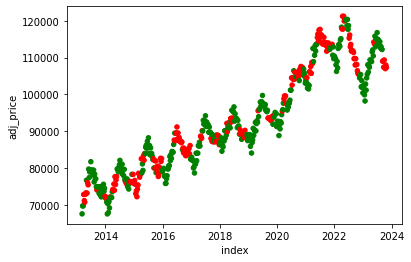

In [62]:
import matplotlib.pyplot as plt
# Diagnostics_1
# reset_index() turning the index into a column in data frame called index
plot_data = price_dfs.iloc[START:].copy()
plot_data.reset_index().plot.scatter(x='index',y='adj_price', color=pred_match)

### so the diagnostics help have ideas how to make the model better:
either adding more dataset(news articles) or adding more predictors

## Check which columns are actually most important to the model

In [63]:
from sklearn.inspection import permutation_importance

In [64]:
rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_dfs[predictors], price_dfs[target])
# which columns are most important
result = permutation_importance(rf, price_dfs[predictors],price_dfs[target], n_repeats=10, random_state=1)

In [65]:
result

{'importances_mean': array([0.17892768, 0.17044888, 0.26982544, 0.24501247]),
 'importances_std': array([0.01140404, 0.0136481 , 0.00703578, 0.01168682]),
 'importances': array([[0.18204489, 0.16458853, 0.180798  , 0.16583541, 0.1882793 ,
         0.19201995, 0.17456359, 0.19950125, 0.16458853, 0.17705736],
        [0.16583541, 0.15586035, 0.18578554, 0.14837905, 0.15835411,
         0.18204489, 0.17830424, 0.17581047, 0.19201995, 0.16209476],
        [0.26433915, 0.27431421, 0.27057357, 0.27930175, 0.27930175,
         0.27057357, 0.25685786, 0.27306733, 0.26932668, 0.2605985 ],
        [0.26184539, 0.23690773, 0.25810474, 0.22693267, 0.24189526,
         0.26309227, 0.24812968, 0.24064838, 0.23690773, 0.23566085]])}

In [66]:
# Diagnostics_2: The higher the value the more important the column is
result['importances_mean']

array([0.17892768, 0.17044888, 0.26982544, 0.24501247])

In [67]:
predictors

['interest', 'vacancy', 'adj_price', 'adj_value']

### improtant_mean indicate how to improve the model
more economic indicators: stock market indicator, alternative commodities, news articles(abt house prices in a bubble or crashing),
data where new houses are beinng built or other external events like natural disasters